<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-lib-and-define-helper-functions" data-toc-modified-id="Load-lib-and-define-helper-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load lib and define helper functions</a></span></li><li><span><a href="#Step-1:-Training-with-BCE-loss" data-toc-modified-id="Step-1:-Training-with-BCE-loss-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 1: Training with BCE loss</a></span><ul class="toc-item"><li><span><a href="#U-ones" data-toc-modified-id="U-ones-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>U-ones</a></span></li><li><span><a href="#U-zeros" data-toc-modified-id="U-zeros-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>U-zeros</a></span></li><li><span><a href="#U-defaults" data-toc-modified-id="U-defaults-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>U-defaults</a></span></li><li><span><a href="#U-one-Smooth" data-toc-modified-id="U-one-Smooth-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>U-one Smooth</a></span></li><li><span><a href="#U-default-smooth" data-toc-modified-id="U-default-smooth-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>U-default smooth</a></span></li></ul></li></ul></div>

# Load lib and define helper functions

In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path

# from libauc.losses import AUCMLoss, CrossEntropyLoss, AUCM_MultiLabel
# from libauc.optimizers import PESG, Adam
# from libauc.models import DenseNet121, DenseNet169
# import torch 
# from PIL import Image
# import numpy as np
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset
# from sklearn.metrics import roc_auc_score
# import pandas as pd
# from tqdm import tqdm
# from tqdm import tqdm_notebook

from dataloader import *
from trainer import *
import AUCMMS
from fastai.vision.all import *

DATA = '/media/samsung/chexpert/CheXpert-v1.0-small/'


# Step 1: Training with BCE loss

## U-ones

In [2]:
data_params={
    'uncertainty_method':'one',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [3]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.457755,0.418379,0.862960,[0.8423622 0.77640374 0.84255515 0.92232143 0.93115942],06:29
1,0.448690,0.433264,0.859331,[0.79805774 0.7635361 0.86663603 0.94077381 0.92764946],06:28
2,0.434820,0.441966,0.880719,[0.83811024 0.81227718 0.88419118 0.9389881 0.93002717],06:28
3,0.427990,0.428777,0.876429,[0.82729659 0.81645499 0.87242647 0.93571429 0.93025362],06:28


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Better model found at epoch 0 with roc_auc_score value: 0.862960388792005.


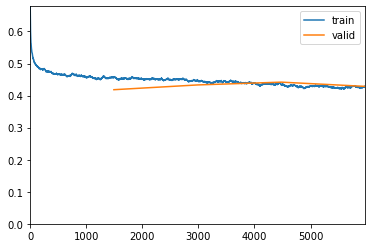

Better model found at epoch 2 with roc_auc_score value: 0.8807187730885826.


In [4]:
WEIGHT_NAME='densenet_bce_uone_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.460212,0.459149,0.838582,[0.77469816 0.79857398 0.78207721 0.90379464 0.93376359],06:37
1,0.450632,0.427710,0.865195,[0.80220472 0.76659982 0.88290441 0.94129464 0.93297101],06:38
2,0.435858,0.436454,0.879204,[0.82976378 0.81567513 0.88474265 0.94084821 0.92498868],06:37
3,0.427966,0.432725,0.875689,[0.81832021 0.81361408 0.87931985 0.93988095 0.92730978],06:38


Better model found at epoch 0 with roc_auc_score value: 0.8385815146940478.


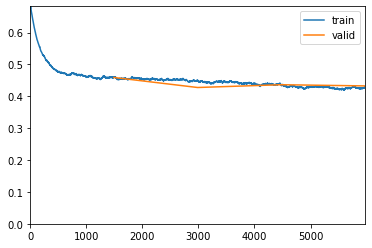

Better model found at epoch 1 with roc_auc_score value: 0.8651949230541863.
Better model found at epoch 2 with roc_auc_score value: 0.8792036904196336.


In [5]:
WEIGHT_NAME='densenet_bce_uone_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-zeros

In [6]:
data_params={
    'uncertainty_method':'zero',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [7]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.358812,0.489028,0.850485,[0.75501312 0.77657086 0.91764706 0.87633929 0.92685688],06:30
1,0.353288,0.476679,0.855261,[0.69795276 0.81082888 0.92454044 0.92269345 0.92028986],06:30
2,0.339237,0.512388,0.882627,[0.81312336 0.8192402 0.91691176 0.93258929 0.93127264],06:29
3,0.333483,0.503471,0.877355,[0.79333333 0.81077317 0.91544118 0.93720238 0.93002717],06:30


Better model found at epoch 0 with roc_auc_score value: 0.8504854415140679.


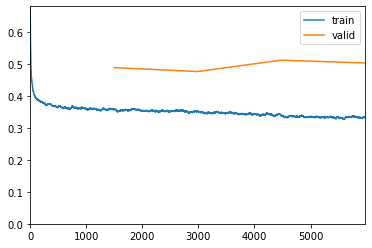

Better model found at epoch 1 with roc_auc_score value: 0.8552610763081493.
Better model found at epoch 2 with roc_auc_score value: 0.8826274502012377.


In [8]:
WEIGHT_NAME='densenet_bce_uzero_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.360663,0.451587,0.868891,[0.7807874 0.80408868 0.92610294 0.90825893 0.92521513],06:39
1,0.354826,0.494089,0.848523,[0.65086614 0.8233066 0.92922794 0.92232143 0.91689312],06:39
2,0.340752,0.512151,0.870817,[0.80330709 0.8152852 0.88299632 0.92529762 0.92719656],06:38
3,0.333808,0.507299,0.869113,[0.7887664 0.80353164 0.90386029 0.92611607 0.92329031],06:38


Better model found at epoch 0 with roc_auc_score value: 0.8688906158122425.


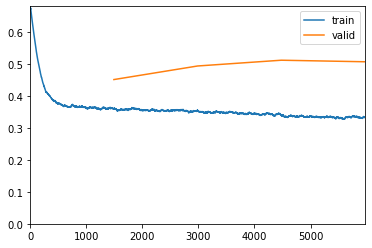

Better model found at epoch 2 with roc_auc_score value: 0.8708165584306611.


In [9]:
WEIGHT_NAME='densenet_bce_uzero_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-defaults

In [10]:
data_params={
    'uncertainty_method':'default',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.396240,0.449033,0.873425,[0.85511811 0.75985963 0.92977941 0.89330357 0.92906476],06:30
1,0.391320,0.455970,0.878527,[0.77826772 0.83004679 0.91764706 0.9469494 0.91972373],06:30
2,0.375397,0.476733,0.888771,[0.84409449 0.80993761 0.92113971 0.93973214 0.92895154],06:29
3,0.368624,0.470325,0.880596,[0.82041995 0.79846257 0.9203125 0.93794643 0.92583786],06:30


Better model found at epoch 0 with roc_auc_score value: 0.8734250967181401.


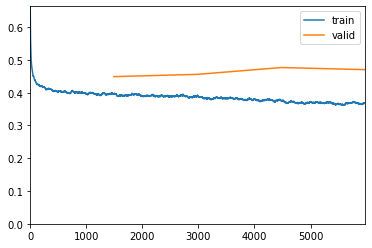

Better model found at epoch 1 with roc_auc_score value: 0.8785269406897551.
Better model found at epoch 2 with roc_auc_score value: 0.8887710976383488.


In [11]:
WEIGHT_NAME='densenet_bce_udefault_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.398994,0.461040,0.853998,[0.76251969 0.77590241 0.90275735 0.9031994 0.92561141],06:38
1,0.393510,0.447538,0.866860,[0.75905512 0.8084336 0.90588235 0.93690476 0.92402627],06:38
2,0.376544,0.463086,0.895661,[0.85002625 0.81879456 0.94053309 0.9422619 0.92668705],06:39
3,0.368690,0.467616,0.884668,[0.82740157 0.80247326 0.93125 0.93943452 0.9227808 ],06:39


Better model found at epoch 0 with roc_auc_score value: 0.8539980524406084.


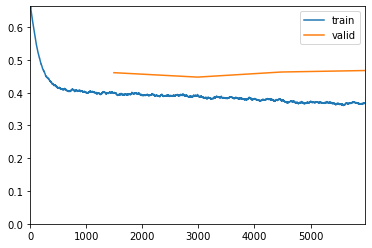

Better model found at epoch 1 with roc_auc_score value: 0.8668604203570258.
Better model found at epoch 2 with roc_auc_score value: 0.895660570019533.


In [12]:
WEIGHT_NAME='densenet_bce_udefault_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-one Smooth

In [13]:
data_params={
    'uncertainty_method':'smoothing',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
    'smooth_lower': 0.55,
    'smooth_upper': 0.85
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [14]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.434904,0.422995,0.863481,[0.79506562 0.78743316 0.87224265 0.9266369 0.93602808],06:29
1,0.427336,0.465570,0.868459,[0.7967979 0.79395053 0.89172794 0.93556548 0.92425272],06:29
2,0.414236,0.461230,0.877706,[0.82782152 0.80486854 0.88529412 0.94136905 0.92917799],06:29
3,0.408411,0.441661,0.876728,[0.81496063 0.81422683 0.88327206 0.94568452 0.92549819],06:30


Better model found at epoch 0 with roc_auc_score value: 0.8634812806817974.


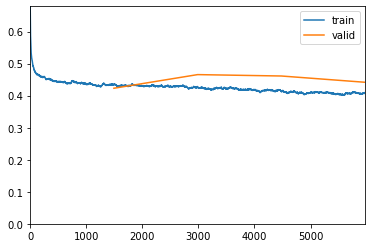

Better model found at epoch 1 with roc_auc_score value: 0.8684589139560155.
Better model found at epoch 2 with roc_auc_score value: 0.8777062430061348.


In [15]:
WEIGHT_NAME='densenet_bce_u1smooth_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.437878,0.448176,0.837703,[0.75396325 0.80252897 0.80597426 0.8985119 0.92753623],06:38
1,0.428957,0.449863,0.855105,[0.74005249 0.7526738 0.91672794 0.94017857 0.92589447],06:38
2,0.415848,0.453349,0.885309,[0.83821522 0.82269385 0.90386029 0.93452381 0.92725317],06:38
3,0.408408,0.440951,0.878017,[0.82104987 0.8125557 0.89273897 0.93563988 0.92810236],06:39


Better model found at epoch 0 with roc_auc_score value: 0.8377029244153855.


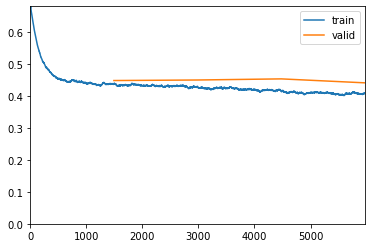

Better model found at epoch 1 with roc_auc_score value: 0.8551054554944975.
Better model found at epoch 2 with roc_auc_score value: 0.8853092694591609.


In [16]:
WEIGHT_NAME='densenet_bce_u1smooth_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

## U-default smooth

In [17]:
data_params={
    'uncertainty_method':'default-smoothing',
    'use_frontal':True,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [18]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.400862,0.448828,0.859549,[0.78010499 0.78197415 0.89466912 0.91651786 0.92447917],06:29
1,0.395840,0.450080,0.862031,[0.73790026 0.79383913 0.92242647 0.93541667 0.92057292],06:29
2,0.380689,0.472823,0.889583,[0.83706037 0.80932487 0.92693015 0.94412202 0.93048007],06:29
3,0.375204,0.464375,0.883163,[0.81847769 0.80258467 0.9234375 0.94434524 0.92697011],06:29


Better model found at epoch 0 with roc_auc_score value: 0.8595490563261811.


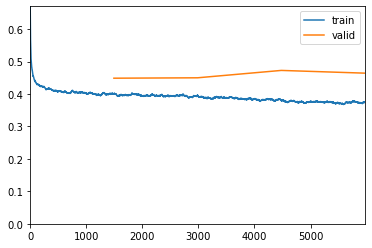

Better model found at epoch 1 with roc_auc_score value: 0.862031088589695.
Better model found at epoch 2 with roc_auc_score value: 0.8895834954192688.


In [19]:
WEIGHT_NAME='densenet_bce_udefaultsmooth_fit'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.402988,0.445839,0.862999,[0.79727034 0.79305927 0.90229779 0.89970238 0.92266757],06:46
1,0.396651,0.445796,0.866077,[0.75322835 0.80342023 0.91277574 0.94010417 0.92085598],06:52
2,0.381816,0.466384,0.886990,[0.83060367 0.81756907 0.91194853 0.94151786 0.93331069],06:50
3,0.374761,0.465676,0.874969,[0.80908136 0.80174911 0.89549632 0.93809524 0.93042346],06:50


Better model found at epoch 0 with roc_auc_score value: 0.8629994715806711.


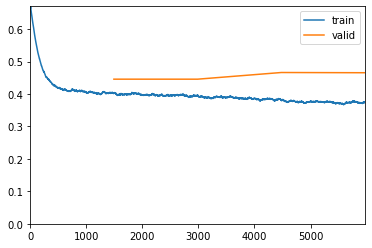

Better model found at epoch 1 with roc_auc_score value: 0.8660768916814803.
Better model found at epoch 2 with roc_auc_score value: 0.8869899645169761.


In [20]:
WEIGHT_NAME='densenet_bce_udefaultsmooth_fit_1cycle'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

TODO: try upsampling on low AUC + frontal/lateral on this